In [ ]:
#Attempting to make a K nearest neighbors/K cluster analysis work on our cleaned dataset
#first, with "from scratch" functions adapted from Jason Brownlee

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import random
import math
import operator
import numpy as np  


In [50]:
plt.style.use('seaborn')
tested_data = pd.read_csv('cleaned_kc_house_data.csv')

tested_data.head()

,id,date,price,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,lat,...,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
0,7129300520,2014-10-13,221900.0,1180,5650,1180,0.0,1955-01-01,1955-01-01,47.5112,...,0,0,0,0,0,0,1,0,0,0
1,6414100192,2014-12-09,538000.0,2570,7242,2170,400.0,1951-01-01,1991-01-01,47.7210,...,0,0,0,0,0,0,0,0,0,0
2,5631500400,2015-02-25,180000.0,770,10000,770,0.0,1933-01-01,1933-01-01,47.7379,...,0,0,0,0,0,0,0,0,0,0
3,2487200875,2014-12-09,604000.0,1960,5000,1050,910.0,1965-01-01,1965-01-01,47.5208,...,0,0,0,0,0,0,0,0,0,0
4,1954400510,2015-02-18,510000.0,1680,8080,1680,0.0,1987-01-01,1987-01-01,47.6168,...,0,0,0,0,0,0,0,0,0,0


In [24]:
def loadDataset(tested_data, split, trainingSet=[] , testSet=[]):
    with open(tested_data, 'rb') as csvfile:
        lines = csv.reader(csvfile)
        dataset = list(lines)
        for x in range(len(dataset)-1):
            for y in range(4):
                dataset[x][y] = float(dataset[x][y])
            if random.random() < split:
                trainingSet.append(dataset[x])
            else:
                testSet.append(dataset[x])

In [25]:
#def distance_formula():
def distance_formula(instance1, instance2, length):
    distance = 0
    for x in range(length):
        distance += pow((instance1[x] - instance2[x]), 2)
    return math.sqrt(distance)


data1 = [2, 2, 2, 'a']
data2 = [4, 4, 4, 'b']
distance = distance_formula(data1, data2, 3)
print('Distance: ' + repr(distance))

Distance: 3.4641016151377544


In [29]:
def getNeighbors(data1, data2, k):
    distances = []
    length = len(data2)-1
    for x in range(len(data1)):
        dist = distance_formula(data2, data1[x], length)
        distances.append((data1[x], dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors


In [19]:
def getResponse(neighbors):
    classVotes = {}
    for x in range(len(neighbors)):
        response = neighbors[x][-1]
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1
    sortedVotes = sorted(classVotes.iteritems(), key=operator.itemgetter(1), reverse=True)
    return sortedVotes[0][0]
 


In [20]:
def getAccuracy(testSet, predictions):
    correct = 0
    for x in range(len(testSet)):
        if testSet[x][-1] == predictions[x]:
            correct += 1
    return (correct/float(len(testSet))) * 100.0


In [22]:
def main():
    # prepare data
    trainingSet=[]
    testSet=[]
    split = 0.8
    loadDataset('cleaned_kc_house_data.csv', split, trainingSet, testSet)
    print('Train set: ' + repr(len(trainingSet)))
    print('Test set: ' + repr(len(testSet)))
    # generate predictions
    predictions=[]
    k = 15
    for x in range(len(testSet)):
        neighbors = getNeighbors(trainingSet, testSet[x], k)
        result = getResponse(neighbors)
        predictions.append(result)
        print('> predicted=' + repr(result) + ', actual=' + repr(testSet[x][-1]))
    accuracy = getAccuracy(testSet, predictions)
    print('Accuracy: ' + repr(accuracy) + '%')

main()

Error: iterator should return strings, not bytes (did you open the file in text mode?)

In [ ]:
#SkiKit Learn K-neighbors Classifier adapted from Scott Robinson

In [61]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test) 

from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_train, y_train)  

y_pred = classifier.predict(X_test)  

import sklearn 

from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

     78000.0       0.00      0.00      0.00         1
     80000.0       0.00      0.00      0.00         0
     81000.0       0.00      0.00      0.00         1
     82000.0       0.00      0.00      0.00         0
     82500.0       0.00      0.00      0.00         0
     83000.0       0.00      0.00      0.00         0
     85000.0       0.00      0.00      0.00         0
     86500.0       0.00      0.00      0.00         1
     90000.0       0.00      0.00      0.00         0
     92000.0       0.00      0.00      0.00         0
     95000.0       0.00      0.00      0.00         1
     99000.0       0.00      0.00      0.00         0
    100000.0       0.00      0.00      0.00         3
    102500.0       0.00      0.00      0.00         0
    104950.0       0.00      0.00      0.00         0
    105000.0   

/Users/flatironstudentaccount/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/flatironstudentaccount/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [ ]:
#K cluster "from scratch"

(21597, 153)


NameError: name 'X' is not defined

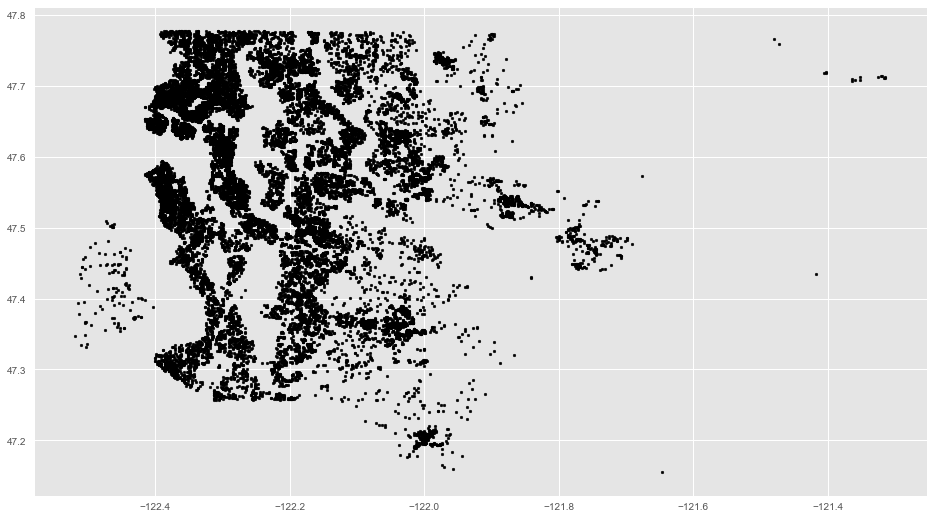

In [31]:
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
# Importing the dataset
data = pd.read_csv('cleaned_kc_house_data.csv')
print(data.shape)
data.head()

# Getting the values and plotting it
x2 = tested_data['lat'].values
x1 = tested_data['long'].values
x = np.array(list(zip(x1, x2)))
plt.scatter(x1, x2, c='black', s=7)

# Euclidean Distance Caculator - equivalent to distance_formula() function above (but why is third argument ax=1?)
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

# Number of clusters
k = 3
# X coordinates of random centroids
C_x = np.random.randint(0, np.max(X)-20, size=k)
# Y coordinates of random centroids
C_y = np.random.randint(0, np.max(X)-20, size=k)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print(C)

# Plotting along with the Centroids
plt.scatter(f1, f2, c='#050505', s=7)
plt.scatter(C_x, C_y, marker='*', s=200, c='g')

# To store the value of centroids when it updates
C_old = np.zeros(C.shape)
# Cluster Lables(0, 1, 2)
clusters = np.zeros(len(X))
# Error func. - Distance between new centroids and old centroids
error = dist(C, C_old, None)
# Loop will run till the error becomes zero
while error != 0:
    # Assigning each value to its closest cluster
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # Storing the old centroid values
    C_old = deepcopy(C)
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)

colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')

In [ ]:
#K cluster via Scikit Learn

In [47]:
# from mpl_toolkits.mplot3d import Axes3D

# from sklearn.cluster import KMeans

# plt.rcParams['figure.figsize'] = (16, 9)

# # Creating a sample dataset with 4 clusters
# X = tested_data[['lat', 'long','price']]


# # y = tested_data['price']
# #fig = plt.figure()
# #ax = Axes3D(fig)
# #ax.scatter(X[:, 0], X[:, 1],X[:,2])

# # Initializing KMeans
# kmeans = KMeans(n_clusters=4)
# # Fitting with inputs
# kmeans = kmeans.fit(X)
# # Predicting the clusters
# labels = kmeans.predict(X)
# # Getting the cluster centers
# C = kmeans.cluster_centers_

# fig = plt.figure()
# ax = Axes3D(fig)
# ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y)
# ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c='#050505', s=1000)

In [60]:
latlong = ['lat', 'long']
y = tested_data['price']
X = tested_data[['lat','long']]
#X = np.c_[np.ones((len(tested_data[latlong]), 1)), tested_data[latlong].values]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
X.shape

(21597, 2)

In [62]:
model = sklearn.linear_model.LinearRegression().fit(X,y)
model.score(X,y)

0.0981746194162526